### Krishna Mridha

#### The Spark Foundation Internship December - 20

##### Data Science & Business Analytics , Task - 7


#### Description: This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM) to predict the closing stock price of a Bank (Federal Bank) using the past 60 days stock price.

In [1]:
#Import Libaries
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
#Read the dataset
df = pd.read_csv('FEDERAL BANK LTD..csv')

In [3]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,20-November-2020,58.55,59.35,56.90,58.45,58.074926,2669451,19713,155028169.0,753091.0,28.21,2.45,-0.10
1,19-November-2020,61.85,61.90,58.10,58.60,59.961538,3796037,26660,227616218.0,1332355.0,35.10,3.80,-3.25
2,18-November-2020,58.00,62.50,57.25,61.90,60.240697,2778081,34186,167353537.0,762623.0,27.45,5.25,3.90
3,17-November-2020,57.00,58.55,57.00,58.00,57.980614,2592596,11282,150320308.0,1264994.0,48.79,1.55,1.00
4,14-November-2020,57.45,57.45,56.15,56.60,56.769441,208823,931,11854765.0,108898.0,52.15,1.30,-0.85


In [4]:
# Covert texttual date to date
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
#df = df[['Date','Open Price','High Price','Low Price','Close Price', 'No.of Shares']]

In [6]:
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,2020-11-20,58.55,59.35,56.90,58.45,58.074926,2669451,19713,155028169.0,753091.0,28.21,2.45,-0.10
1,2020-11-19,61.85,61.90,58.10,58.60,59.961538,3796037,26660,227616218.0,1332355.0,35.10,3.80,-3.25
2,2020-11-18,58.00,62.50,57.25,61.90,60.240697,2778081,34186,167353537.0,762623.0,27.45,5.25,3.90
3,2020-11-17,57.00,58.55,57.00,58.00,57.980614,2592596,11282,150320308.0,1264994.0,48.79,1.55,1.00
4,2020-11-14,57.45,57.45,56.15,56.60,56.769441,208823,931,11854765.0,108898.0,52.15,1.30,-0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190,2000-01-07,50.00,50.00,47.00,47.00,48.723850,17610,107,858027.0,NaN,NaN,3.00,-3.00
5191,2000-01-06,49.00,51.00,49.00,50.00,50.324267,11250,71,566148.0,NaN,NaN,2.00,1.00
5192,2000-01-05,53.95,53.95,49.50,49.50,50.386878,11050,70,556775.0,NaN,NaN,4.45,-4.45
5193,2000-01-04,59.30,59.30,52.00,53.75,53.517233,16712,118,894380.0,NaN,NaN,7.30,-5.55


In [7]:
#check missing values
df.isnull().sum()

Date                           0
Open Price                     0
High Price                     0
Low Price                      0
Close Price                    0
WAP                            0
No.of Shares                   0
No. of Trades                  0
Total Turnover (Rs.)           0
Deliverable Quantity         538
% Deli. Qty to Traded Qty    538
Spread High-Low                0
Spread Close-Open              0
dtype: int64

In [8]:
#Filled the missing values with the mean value
df['Deliverable Quantity'] = df['Deliverable Quantity'].fillna(df['Deliverable Quantity'].mean())
df['% Deli. Qty to Traded Qty'] = df['% Deli. Qty to Traded Qty'].fillna(df['% Deli. Qty to Traded Qty'].mean())

In [9]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread High-Low              0
Spread Close-Open            0
dtype: int64

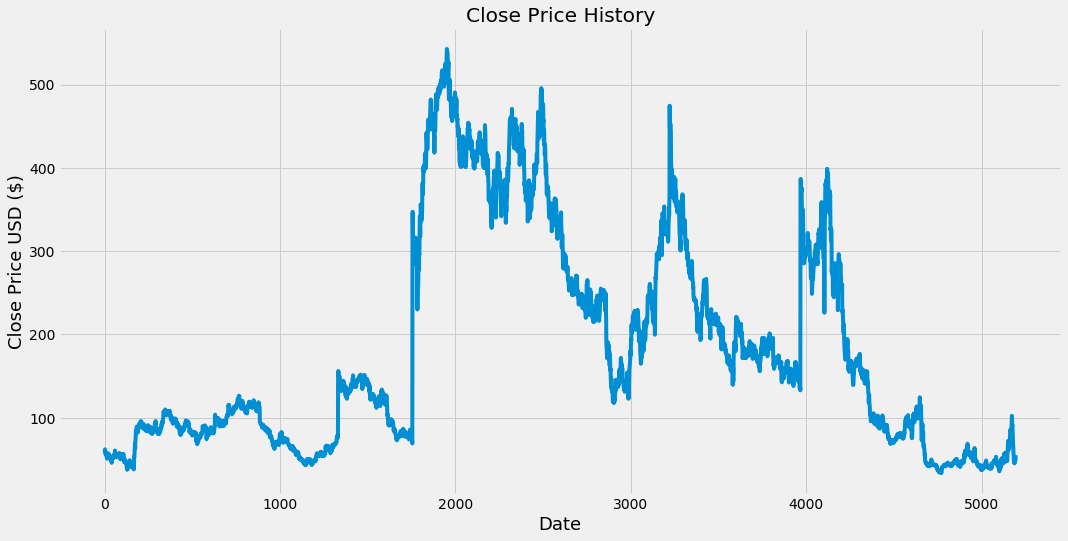

In [10]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close Price'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [11]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close Price'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

training_data_len


4156

In [12]:
len(dataset)

5195

In [13]:
check = len(dataset)-training_data_len
check

1039

In [14]:
# Scaled the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04927849],
       [0.04957299],
       [0.05605183],
       ...,
       [0.03170708],
       [0.04005105],
       [0.04250515]])

In [15]:
k = scaled_data[check:,: ]
len(k)

4156

In [16]:
#Create the scaled training data set 
train_data = scaled_data[check: ,: ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [17]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train.shape

(4096, 60)

In [19]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [20]:
x_train.shape

(4096, 60, 1)

In [21]:
len(train_data)

4156

In [22]:
check

1039

In [23]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [24]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4096/4096 [==============================] - 161s 39ms/step - loss: 0.0016


In [26]:
#Test data set
test_data = scaled_data[0:check +60, : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[0 :check, : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [27]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)
len(x_test)

1039

In [28]:
test_data.shape

(1099, 1)

In [29]:
y_test.shape

(1039, 1)

In [30]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [31]:
test_data.shape

(1099, 1)

In [32]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [33]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

19.67570551079389

In [34]:
# report performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test,predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(predictions,y_test)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(predictions,y_test))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(predictions-y_test)/np.abs(y_test))
print('MAPE: '+str(mape))

MSE: 387.133387347485
MAE: 15.073016049015166
RMSE: 19.67570551079389
MAPE: 0.20861820774255133


In [35]:
#Plot/Create the data for the graph
train = data[check:]
valid = data[0:check]
valid['Predictions'] = predictions

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
len(predictions)

1039

In [37]:
len(valid)

1039

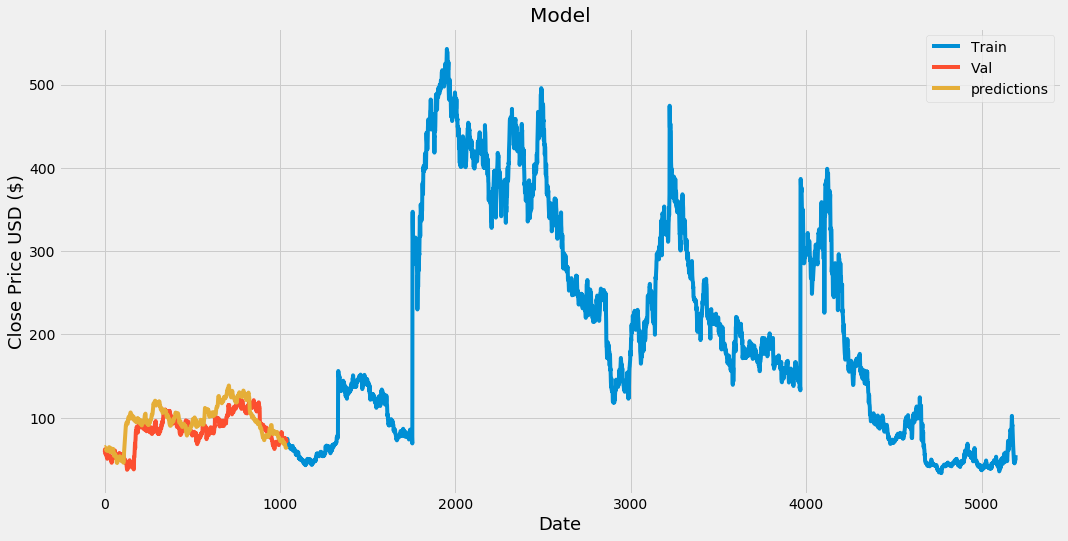

In [41]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='upper right')
plt.savefig('full_federal.png')

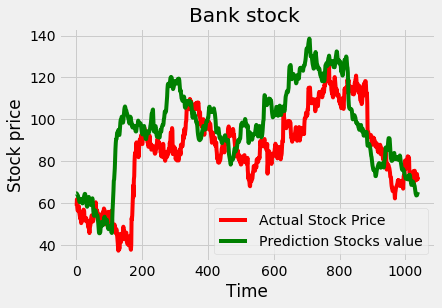

In [42]:
plt.plot(y_test, color='red', label="Actual Stock Price")
plt.plot(predictions, color='green',label='Prediction Stocks value')
plt.title('Bank stock ')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.savefig('actual_predict_federal.png')

In [40]:
valid

,Close Price,Predictions
0,58.45,64.683838
1,58.60,64.717247
2,61.90,64.424126
3,58.00,64.029877
4,56.60,63.891254
...,...,...
1034,71.85,63.785454
1035,73.95,63.837723
1036,72.35,64.289246
1037,71.50,64.791039
